# A origem dos Jogadores

*Importando as Bibliotecas*

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress

### 1.Limpeza e Organização do Dataset

In [2]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

#### 1.1.Filtrando os dados relevantes para análises estatísticas

In [3]:
# Verificando se existe valores nulos
display(data.isnull().sum())
display(data.info())

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


None

Como não existe valores nulos, não se faz necessária a limpeza.

In [4]:
#Removendo dados que não são relevantes para nossa análise

columns_irrelevant = ["fifa_update","value_eur","wage_eur","age","height_cm","weight_kg","player_url",
                      "update_as_of", "short_name", "long_name", "player_positions",'potential',
                      "dob", "club_team_id", "club_name", "league_id", "league_name", "league_level", "club_position", "club_jersey_number",
                      "club_loaned_from", "club_joined_date", 
                      "club_contract_valid_until_year", "nationality_id", "nationality_name", "nation_team_id", "nation_position", "nation_jersey_number",
                      "preferred_foot", "weak_foot", "skill_moves", "international_reputation", "work_rate", "body_type", "real_face", 
                      "release_clause_eur", "player_tags", "player_traits"]

players_attributes = data.drop(columns=columns_irrelevant)
players_attributes

,player_id,fifa_version,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,24.0,91,97.0,90.0,80.0,92.0,36.0,78.0,78,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,24.0,91,89.0,93.0,66.0,80.0,45.0,88.0,47,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,24.0,91,72.0,88.0,94.0,87.0,65.0,78.0,95,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,24.0,90,80.0,87.0,90.0,94.0,33.0,64.0,83,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,24.0,90,79.0,88.0,83.0,87.0,39.0,78.0,75,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,15.0,41,66.0,25.0,29.0,30.0,39.0,53.0,25,...,38,38,38,37,40,41,41,41,40,10
180017,225509,15.0,41,64.0,41.0,27.0,35.0,27.0,41.0,22,...,30,30,30,31,32,31,31,31,32,14
180018,217591,15.0,40,58.0,27.0,35.0,31.0,52.0,68.0,49,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,15.0,40,72.0,27.0,27.0,30.0,35.0,61.0,23,...,36,36,36,37,39,40,40,40,39,13


#### 1.2.Divindo o Dataset por categoria

Dividimos o Dataset por setores, escolhendo as habilidades que são mais relevantes para cada área.

##### 1.2.1.Categoria Defensiva

A categoria defensiva vai englobar o goleiro, os zagueiros, os laterais e os alas defensivos. 
Engloba os jogares responsáveis por defender e recuperar a posse da bola.

Para os laterais consideramos a velocidade como atributo mais importante. Para os zagueiros escolhemos a noção defensiva, pois sua responsabilidade defensiva é maior que a dos laterais.

No goleiro consideramos os reflexos como o maior impactante no desempenho.

In [5]:

defense_players = data.loc[data["player_positions"].isin(["GK", "CB", "LB", "RB","LWB","RWB"])]
defense_players = defense_players[["fifa_version", "player_positions", "short_name",
                                   "movement_sprint_speed","defending_marking_awareness","goalkeeping_reflexes","overall" ]]

defense_players

,fifa_version,player_positions,short_name,movement_sprint_speed,defending_marking_awareness,goalkeeping_reflexes,overall
6,24.0,GK,T. Courtois,52,20,93,90
9,24.0,GK,Alisson,49,15,89,89
11,24.0,CB,Rúben Dias,69,91,12,89
13,24.0,GK,M. ter Stegen,50,25,91,89
15,24.0,CB,V. van Dijk,87,90,11,89
...,...,...,...,...,...,...,...
180011,15.0,GK,B. Richardson,25,25,31,43
180013,15.0,GK,L. Pilling,41,25,45,42
180015,15.0,GK,S. Ramsbottom,40,25,44,42
180016,15.0,CB,E. Redman,66,38,6,41


##### 1.2.2.Categoria de Meio-Campo

 A categoria Meio-Campo vai englobar os meia-centrais, os volantes, os meia-abertas e os meia-atacantes.
 Engloba os jogares responsáveis pelo jogo rodar.

Para os volantes, meia-centrais e meia-atacantes consideramos o passe curto o atributo mais importante, já que são os maiores responsáveis por essa função. 

Para os meia-abertos escolhemos o drible pois, assim como os pontas, eles fazem mais jogadas individuais.

In [6]:
midfield_players = data.loc[data["player_positions"].isin(["CDM", "LM", "RM", "CM","CAM"])]
midfield_players = midfield_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_short_passing","dribbling","overall"]]

midfield_players

,fifa_version,player_positions,short_name,attacking_short_passing,dribbling,overall
14,24.0,CDM,Casemiro,84,73.0,89
33,24.0,CM,L. Modrić,91,87.0,87
37,24.0,CM,Pedri,88,88.0,86
45,24.0,CM,N. Barella,86,85.0,86
60,24.0,CM,S. Milinković-Savić,86,82.0,86
...,...,...,...,...,...,...
179995,15.0,CM,A. Murdoch,40,57.0,45
179999,15.0,CM,G. Casey,50,46.0,45
180003,15.0,CM,K. Nasser,52,48.0,45
180006,15.0,CM,T. Smith,54,44.0,44


##### 1.2.3.Categoria Ataque

A categoria Ataque engloba os jogadores encarregados de finalizar as jogadas. Sendo eles os pontas, centroavantes e segundo-atacantes.

Para os pontas, escolhemos o drible pois, assim como os meia-abertos, eles fazem mais jogadas individuais.

Para os centroavantes e segundo-atacantes escolhemos a finalização, porque têm como papel principal finalizar as jogadas, ou seja, fazer o gol.

In [7]:
attack_players = data.loc[data["player_positions"].isin(["LW", "ST", "RW", "CF"])]
attack_players = attack_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_finishing","dribbling", "overall"]]

attack_players

,fifa_version,player_positions,short_name,attacking_finishing,dribbling,overall
1,24.0,ST,E. Haaland,96,80.0,91
5,24.0,ST,R. Lewandowski,93,87.0,90
7,24.0,ST,H. Kane,95,83.0,90
8,24.0,LW,Vini Jr.,89,90.0,89
12,24.0,LW,Neymar Jr,83,93.0,89
...,...,...,...,...,...,...
179938,15.0,ST,C. O'Connor,51,44.0,47
179949,15.0,ST,M. Bloomfield,48,50.0,47
179967,15.0,ST,S. Austin,48,48.0,46
179996,15.0,ST,A. Peterson,29,53.0,45


#### 1.3 Exploração Inicial.

Iremos calcular medidas de centralidade e dispersão categoria por categoria, analisando por ano e pegando a posição do jogador e sua categoria mais importante.

##### 1.3.1.Categoria Defensiva

In [ ]:
# For para calcular as medidas por ano e separando as posições por suas respectivas habilidades principais.
for i in range(15,25):
    fullbacks = defense_players[defense_players["player_positions"].isin(["LB", "RB", "LWB", "RWB"]) & (defense_players["fifa_version"] == i)]["movement_sprint_speed"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Versão Fifa {i} - Laterais')
    print(fullbacks)
    fullbacks.plot(kind='box', title=f'Boxplot da Velocidade dos Laterais - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

In [ ]:
for i in range(15,25):
    centrebacks = defense_players[defense_players["player_positions"].isin(["CB"]) & (defense_players["fifa_version"] == i)]["defending_marking_awareness"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(centrebacks)
    
    centrebacks.plot(kind='box', title=f'Boxplot da Noção Defensiva dos Zagueiros - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()
 

In [ ]:
for i in range(15,25):
    goalkeepers = defense_players[defense_players["player_positions"].isin(["GK"]) & (defense_players["fifa_version"] == i)]["goalkeeping_reflexes"].describe(exclude = defense_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(goalkeepers)

    goalkeepers.plot(kind='box', title=f'Boxplot de Reflexo dos Goleiros - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

##### 1.3.2.Categoria Meio-Campo

In [ ]:
for i in range(15,25):
    meias = midfield_players[midfield_players["player_positions"].isin(["CM", "CDM", "CAM"]) & (midfield_players["fifa_version"] == i)]["attacking_short_passing"].describe(exclude = midfield_players["fifa_version"], include = None)
    print(f'Fifa Version {i}')
    print(meias)
    
    meias.plot(kind='box', title=f'Boxplot do Passe curto dos Meias - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

In [ ]:
for i in range(15,25):
    meias_abertos = midfield_players[midfield_players["player_positions"].isin(["RM", "LM"]) & (midfield_players["fifa_version"] == i)]["dribbling"].describe(exclude = midfield_players["fifa_version"], include = None)
    print(f'Fifa Version {i}')
    print(meias_abertos)
    meias_abertos.plot(kind='box', title=f'Boxplot do Drible dos Meias Abertos - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

##### 1.3.3. Categoria Ataque

In [ ]:
for i in range(15,25):
    pontas = attack_players[attack_players["player_positions"].isin(["LW","RW"]) & (attack_players["fifa_version"] == i)]["dribbling"].describe(exclude = attack_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(pontas)

    pontas.plot(kind='box', title=f'Boxplot de Drible dos Atacantes - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()

In [ ]:
for i in range(15,25):
    centroavantes = attack_players[attack_players["player_positions"].isin(["ST","CF"]) & (attack_players["fifa_version"] == i)]["attacking_finishing"].describe(exclude = attack_players["fifa_version"], include = None)
    print(f' Fifa Version {i}')
    print(centroavantes)
    
    centroavantes.plot(kind='box', title=f'Boxplot da Finalização dos Atacantes - FIFA Version {i}')
    plt.ylim(0,150)
    plt.show()


#### 1.4.Visualização de Dados

##### 1.4.1 Análise de overall por setor

Comparando a média entre os setores, descobri qual tem os jogadores com maiores overall.

In [15]:
# Pegando a médoa de overall por setor
media_defensores = np.mean(defense_players["overall"])
media_meias = np.mean(midfield_players["overall"])
media_atacantes = np.mean(attack_players["overall"])


setores = ['Defesa','Meio-Campo','Atacantes']
media_setor = [media_defensores,media_meias,media_atacantes]

<function matplotlib.pyplot.show(close=None, block=None)>

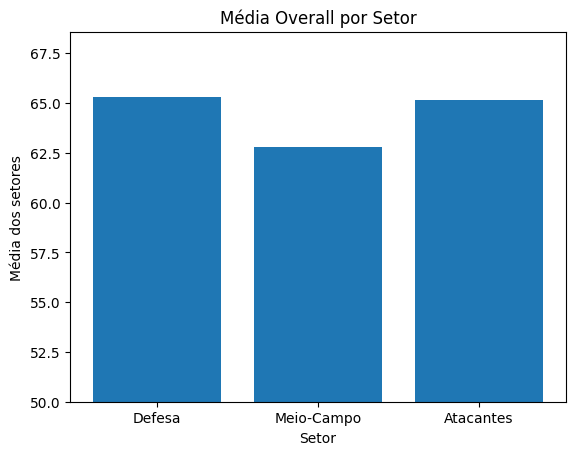

In [16]:
plt.bar(setores,media_setor)
plt.title('Média Overall por Setor')
plt.xlabel('Setor')
plt.ylabel('Média dos setores')

#Facilitar a visualição das diferenças de níveis entre eles
plt.ylim(50,None)
plt.show

Analisando esse gráfico, podemos observar que o setor defensivo possui a maior média de overall.

##### 1.4.2.Constância entre os setores

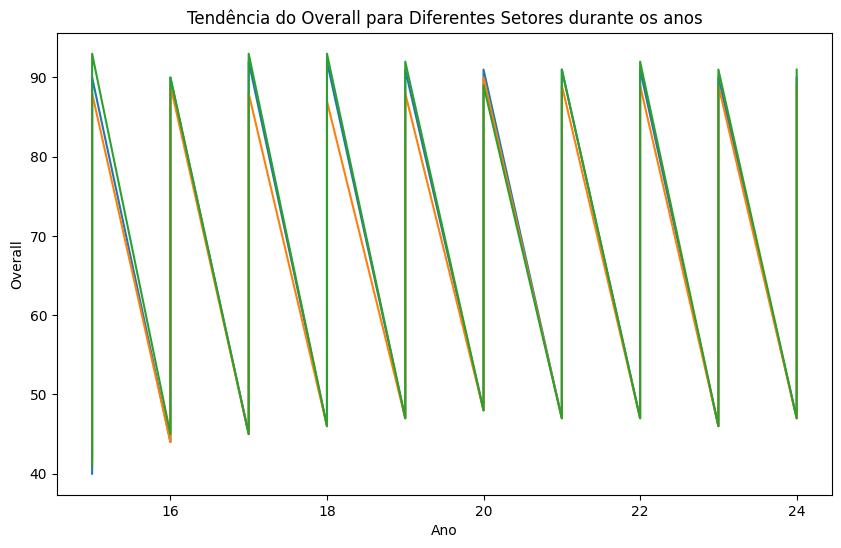

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(defense_players['fifa_version'],defense_players['overall'],label='Jogadores da Defesa')
ax.plot(midfield_players['fifa_version'],midfield_players['overall'],label='Jogadores de Meio-Campo')
ax.plot(attack_players['fifa_version'],attack_players['overall'],label='Jogadores de Ataque')

ax.set_xlabel('Ano')
ax.set_ylabel('Overall')
ax.set_title('Tendência do Overall para Diferentes Setores durante os anos')

plt.show()

##### 1.4.3.Comparando atributos de jogadores

In [29]:

def ComparePlayers(posicao, dataset, atribute: str):
    for i in range(15,25):
        area = dataset[(dataset["player_positions"].isin([posicao])) & (dataset["fifa_version"] == i) & (dataset[atribute])]
        player = []
        for j in range (0,10):
            player.append(area[atribute].iloc[j])
        player = sorted(player, reverse=True)
        print("Top 10", atribute, "dos", posicao, "no FIFA", i,":",player)


ComparePlayers("ST", attack_players, "attacking_finishing")



Top 10 attacking_finishing dos ST no FIFA 15 : [91, 91, 91, 89, 89, 85, 85, 85, 83, 83]
Top 10 attacking_finishing dos ST no FIFA 16 : [89, 85, 85, 85, 85, 85, 83, 83, 83, 83]
Top 10 attacking_finishing dos ST no FIFA 17 : [91, 91, 89, 87, 87, 85, 85, 83, 81, 79]
Top 10 attacking_finishing dos ST no FIFA 18 : [91, 91, 89, 89, 87, 87, 87, 87, 85, 83]
Top 10 attacking_finishing dos ST no FIFA 19 : [93, 91, 91, 89, 89, 87, 87, 87, 87, 81]
Top 10 attacking_finishing dos ST no FIFA 20 : [93, 91, 89, 89, 87, 87, 85, 85, 83, 81]
Top 10 attacking_finishing dos ST no FIFA 21 : [93, 87, 87, 85, 85, 85, 85, 83, 83, 81]
Top 10 attacking_finishing dos ST no FIFA 22 : [95, 93, 93, 91, 89, 87, 87, 87, 85, 85]
Top 10 attacking_finishing dos ST no FIFA 23 : [93, 93, 91, 89, 87, 87, 87, 87, 87, 87]
Top 10 attacking_finishing dos ST no FIFA 24 : [95, 93, 91, 91, 87, 87, 87, 85, 85, 83]


In [30]:
def ComparePlayers(posicao, dataset, atribute: str):
    for i in range(15,25):
        area = dataset[(dataset["player_positions"].isin([posicao])) & (dataset["fifa_version"] == i) & (dataset[atribute])]
        player = []
        for j in range (0,10):
            player.append(area[atribute].iloc[j])
        player = sorted(player, reverse=True)
        print("Top 10", atribute, "dos", posicao, "no FIFA", i,":",player)


ComparePlayers("GK", defense_players, "goalkeeping_reflexes")

Top 10 goalkeeping_reflexes dos GK no FIFA 15 : [87, 87, 85, 85, 85, 85, 85, 83, 83, 75]
Top 10 goalkeeping_reflexes dos GK no FIFA 16 : [89, 87, 85, 85, 85, 85, 83, 83, 83, 79]
Top 10 goalkeeping_reflexes dos GK no FIFA 17 : [89, 89, 87, 85, 85, 85, 85, 85, 83, 83]
Top 10 goalkeeping_reflexes dos GK no FIFA 18 : [89, 87, 87, 87, 87, 85, 85, 85, 83, 81]
Top 10 goalkeeping_reflexes dos GK no FIFA 19 : [89, 89, 87, 87, 87, 87, 85, 85, 83, 83]
Top 10 goalkeeping_reflexes dos GK no FIFA 20 : [91, 89, 89, 89, 89, 89, 87, 87, 85, 85]
Top 10 goalkeeping_reflexes dos GK no FIFA 21 : [89, 89, 89, 89, 89, 89, 87, 85, 85, 83]
Top 10 goalkeeping_reflexes dos GK no FIFA 22 : [89, 89, 87, 87, 87, 87, 85, 85, 85, 83]
Top 10 goalkeeping_reflexes dos GK no FIFA 23 : [89, 89, 89, 89, 89, 89, 87, 87, 85, 85]
Top 10 goalkeeping_reflexes dos GK no FIFA 24 : [93, 91, 89, 89, 89, 89, 87, 87, 87, 85]


##### 1.4.4.Identificação de Fatores Importantes

###### 1.4.4.1.Fatores Importantes para a Categoria de Defesa

Regressão linear examinando a relação entre a velocidade e a classificação geral dos jogadores de defesa na versão 15.0 do FIFA.

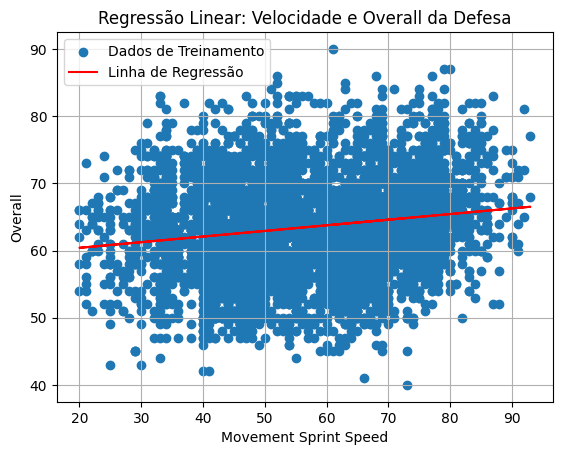

In [150]:

dados_ano_15 = defense_players[defense_players["fifa_version"] == 15]

x = dados_ano_15['movement_sprint_speed']
y = dados_ano_15['overall']


slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular os valores previstos pela regressão linear
predicted_y = slope * x + intercept


plt.scatter(x, y, label='Dados de Treinamento')


plt.plot(x, predicted_y, color='red', label='Linha de Regressão')


plt.xlabel('Movement Sprint Speed')
plt.ylabel('Overall')
plt.title('Regressão Linear: Velocidade e Overall da Defesa')
plt.legend()


plt.grid(True)
plt.show()